In [26]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = -4
weight2 = 0
bias = 1


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
#AND W1,W2 = 1 , b = -2
#Peceptron (y') < 0 = False
# (0,0) 0 + 0 - 2 = FALSE
# (1,0) 1 + 0 - 2 = FALSE
# (1,1) 0 + 0 - 2 = TRUE
correct_outputs = [False, False, False, True]

# OR W1,W2 = 2 , b = -2
# OR W1,W2 = 1 , b = -1
# Peceptron (y') < 0 = False
# (0,0) 0 + 0 - 2 => FALSE
# (1,0) 2 + 0 - 2 => TRUE
# (1,1) 2 + 2 - 2 = TRUE
correct_outputs = [False, True, True, True]

# NOT W2 = -2, W1 = 0 , b = 1
# (0,0) 0 + 0 + 1    => TRUE
# (1,0) -2 + 0 + 1   => FALSE
# (0,1) 0 + 0 + 1    => TRUE
# (1,1) -2 + 0 + 1   => FALSE
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


You got 2 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                     1                    1          Yes
       0          1                     1                    1           No
       1          0                    -3                    0           No
       1          1                    -3                    0          Yes


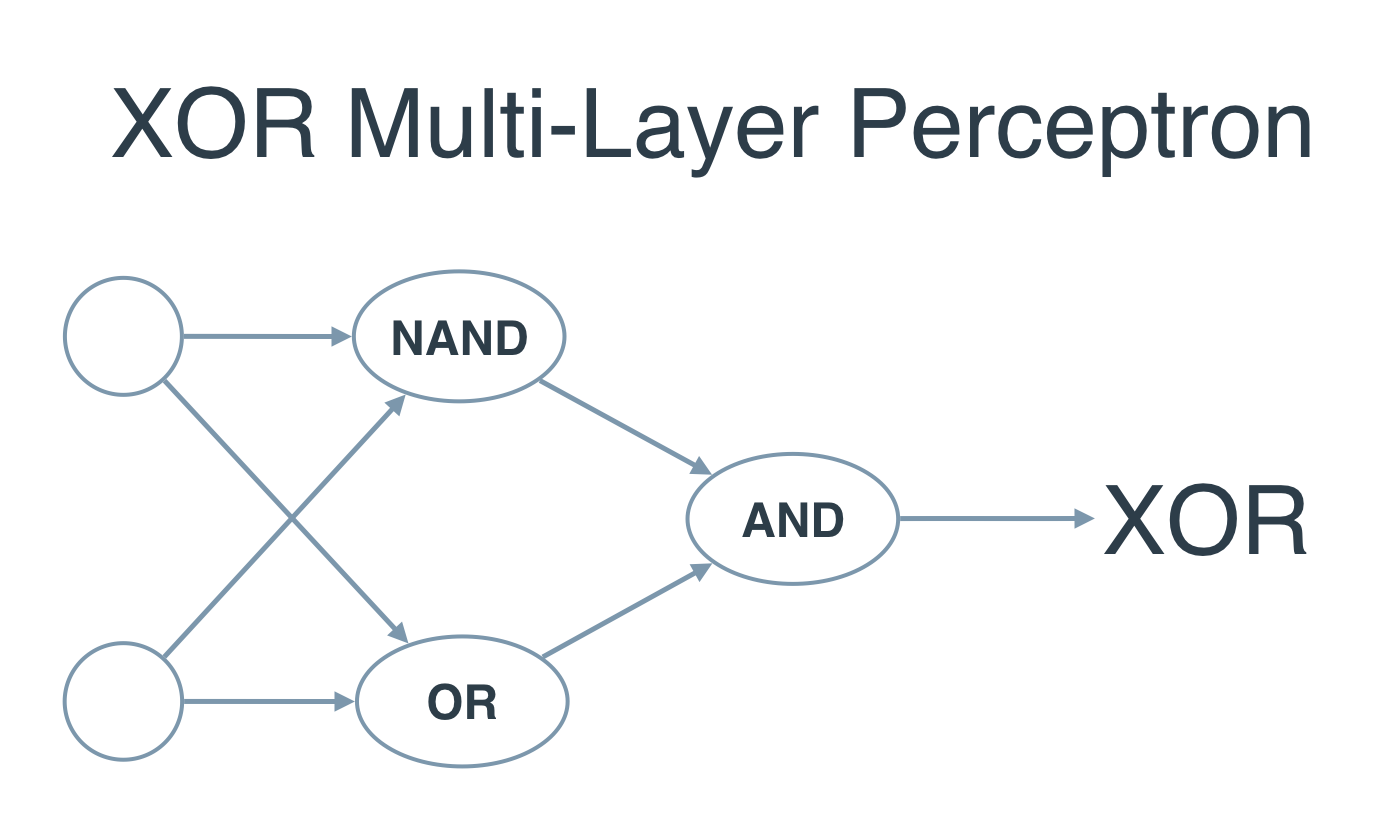

In [32]:
from IPython.display import Image
Image('img/XOR.png')
#NAND is AND -> NOT

In [ ]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines
